<a href="https://colab.research.google.com/github/Ivan21T/NeuralNetworks/blob/main/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#Work with iris->flower dataset
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [ ]:
#manual seed
torch.manual_seed(41)

model=Model()

In [ ]:
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df=pandas.read_csv(url)
my_df["species"]=my_df["species"].replace("setosa",0.0)
my_df["species"]=my_df["species"].replace("virginica",1.0)
my_df["species"]=my_df["species"].replace("versicolor",2.0)

<ipython-input-3-cb5716f98477>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["species"]=my_df["species"].replace("versicolor",2.0)


In [ ]:
#input data taking
X=my_df.drop("species",axis=1)
y=my_df["species"]

In [ ]:
#Convert this to numpy arrays
X=X.values
y=y.values
from sklearn.model_selection import train_test_split
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [ ]:
#train y label with long because output is in long
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
#Measure the error
criterion=nn.CrossEntropyLoss()
#optimiser
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
#test model
epochs = 100
loss = []

for i in range(epochs):
    # Zero the gradients before the forward pass
    optimizer.zero_grad()

    # Predict data through model (forward pass)
    y_pred = model(X_train)

    # Calculate loss
    loss_fn = criterion(y_pred, y_train)
    loss.append(loss_fn.detach().numpy())  # Correctly append loss to the list

    # Backward pass (compute gradients)
    loss_fn.backward()

    # Update weights
    optimizer.step()

    # Optionally print loss every few epochs
    if (i + 1) % 10 == 0:
        print(f'Epoch [{i + 1}/{epochs}], Loss: {loss_fn.item():.4f}')


Epoch [10/100], Loss: 1.0616
Epoch [20/100], Loss: 0.9383
Epoch [30/100], Loss: 0.6563
Epoch [40/100], Loss: 0.4165
Epoch [50/100], Loss: 0.2622
Epoch [60/100], Loss: 0.1443
Epoch [70/100], Loss: 0.0796
Epoch [80/100], Loss: 0.0521
Epoch [90/100], Loss: 0.0397
Epoch [100/100], Loss: 0.0332


Text(0, 0.5, '[array(1.1397022, dtype=float32), array(1.1253167, dtype=float32), array(1.1137296, dtype=float32), array(1.1042349, dtype=float32), array(1.095838, dtype=float32), array(1.0884808, dtype=float32), array(1.081664, dtype=float32), array(1.0750091, dtype=float32), array(1.068355, dtype=float32), array(1.0616359, dtype=float32), array(1.0544101, dtype=float32), array(1.0466532, dtype=float32), array(1.0379556, dtype=float32), array(1.0282665, dtype=float32), array(1.01734, dtype=float32), array(1.0048941, dtype=float32), array(0.99094844, dtype=float32), array(0.9752462, dtype=float32), array(0.9577521, dtype=float32), array(0.9382714, dtype=float32), array(0.9166716, dtype=float32), array(0.8931471, dtype=float32), array(0.86762893, dtype=float32), array(0.8403072, dtype=float32), array(0.81159645, dtype=float32), array(0.7816381, dtype=float32), array(0.7506357, dtype=float32), array(0.7190591, dtype=float32), array(0.68748087, dtype=float32), array(0.65628475, dtype=float

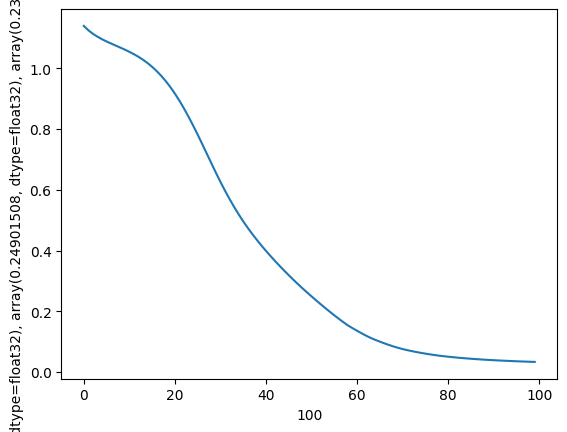

In [ ]:
plt.plot(range(epochs),loss)
plt.xlabel(epochs)
plt.ylabel(loss)

In [ ]:
with torch.no_grad():
  y_eval=model.forward(X_test)
  loss_eval=criterion(y_eval,y_test)
loss_eval

tensor(0.1286)

In [ ]:
correct=0
all=0;
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    print(f'{i+1}). {str(y_val)} \t {y_test[i]}')
    if y_val.argmax().item()==y_test[i]:
      correct+=1
    all+=1
print(f"From {all}, {correct} correct")

1). tensor([-6.9815,  5.7408,  2.8455]) 	 1
2). tensor([-10.1079,   9.1258,   1.3065]) 	 1
3). tensor([-10.9584,   9.6312,   2.1591]) 	 1
4). tensor([-2.8685,  1.0380,  5.6331]) 	 2
5). tensor([-8.7846,  7.4753,  2.6232]) 	 1
6). tensor([-0.5798, -1.5149,  7.0015]) 	 2
7). tensor([-6.4517,  4.9981,  3.6209]) 	 1
8). tensor([-2.5549,  0.6965,  5.7920]) 	 2
9). tensor([-7.5313,  6.1537,  3.1311]) 	 1
10). tensor([-10.7096,   9.6681,   1.3449]) 	 1
11). tensor([-5.9053,  4.4576,  3.7346]) 	 1
12). tensor([ 13.1833, -14.0755,   5.5305]) 	 0
13). tensor([ 12.0059, -12.7652,   4.9037]) 	 0
14). tensor([ 1.2265, -3.0406,  6.3975]) 	 2
15). tensor([ 11.4834, -12.5821,   5.9413]) 	 0
16). tensor([-5.4799,  3.9468,  4.1003]) 	 1
17). tensor([ 11.9423, -12.8441,   5.3712]) 	 0
18). tensor([-6.5523,  5.2595,  3.1084]) 	 2
19). tensor([ 12.6839, -13.5421,   5.3429]) 	 0
20). tensor([ 10.5711, -11.5527,   5.4033]) 	 0
21). tensor([ 0.4430, -2.3670,  6.6304]) 	 2
22). tensor([-9.8637,  8.6577,  2.048

In [ ]:
#saving model
torch.save(model.state_dict(),"iris_model.pt")

In [ ]:
#loading model
testing_saveFunction=Model()
testing_saveFunction.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-17-efc9c662d940>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  testing_saveFunction.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>